In [3]:
import pickle
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [4]:
with open('batsmandatabase__allMatches.pkl', 'rb') as file: 
    unpickler = pickle.Unpickler(file)
    batsmandatabase = unpickler.load() 
    file.close()
with open('bowlerdatabase__allMatches.pkl', 'rb') as file: 
    unpickler = pickle.Unpickler(file)
    bowlerdatabase = unpickler.load() 
    file.close()
    
with open('playerVplayer__2016_2020.pkl', 'rb') as file: 
    unpickler = pickle.Unpickler(file)
    playerVplayer = unpickler.load() 
    file.close()

In [24]:
for name in list(bowlerdatabase.keys()):
    if 'Khan' in name:
        print(name)

Z Khan
Kamran Khan
Rashid Khan
Avesh Khan
SN Khan


In [25]:
bowlerListinFirstSixOvers=['PJ Cummins','SP Narine','M Prasidh Krishna','B Kumar','Sandeep Sharma','Rashid Khan']
bowlerListinMiddleOvers=['KH Pandya','RD Chahar','KA Pollard','YS Chahal','Washington Sundar','GJ Maxwell']
bowlerListinDeathOvers=['JJ Bumrah','TA Boult','Mohammed Siraj','NA Saini']
bowlersEconomy=[]
bowlersStrkrate=[]
bowlersWicket=[]
totaloversBowled=[]
startdate='2008-01-01'
enddate='2021-01-01'
for bowler in bowlerListinFirstSixOvers:
#     if bowler!='TA Boult':
#         continue
    bowlerRuns=0
    bowlerBalls=0
    bowlerWicket=0
    
    for j in bowlerdatabase[bowler]['Bowl']:
        if datetime.datetime.strptime(enddate, '%Y-%m-%d')<j['matchDate']\
        or datetime.datetime.strptime(startdate, '%Y-%m-%d')>j['matchDate']:
            continue
            
        for i in list(j['BallbyBall'].keys()):
#             print(i)
            if i <=119 and i >=84:
                bowlerBalls+=1
        
                for k in j['BallbyBall'][i]:
                    if k['out']=='no wickets' or k['out']=='run out':
                        bowlerWicket+=0
                    else:
                        bowlerWicket+=1
#                     print(i,k)
                    
                    if 'wides' in list(k['extras'].keys()):
                        bowlerRuns+=k['extras']['wides']
                    elif 'noballs' in list(k.keys()):
                        bowlerRuns+=(k['batsmanrun']+1)

                else:
                    bowlerRuns+=k['batsmanrun']
        if bowlerBalls!=0:            
            bowlerEconomy=round((((bowlerRuns)/(bowlerBalls))*6),2)
        else:
            bowlerEconomy=='NA'
        if bowlerWicket==0:
            bowlerStrkrate='NA'
        else:
            bowlerStrkrate=round(((bowlerBalls)/(bowlerWicket)),2)
            
        oversBowled=str(int(bowlerBalls/6))+'.'+str(bowlerBalls%6)
    bowlersEconomy.append(bowlerEconomy) 
    bowlersStrkrate.append(bowlerStrkrate)
    bowlersWicket.append(bowlerWicket)
    totaloversBowled.append(oversBowled)
#     print(bowlerRuns,bowlerBalls,bowlerWicket,bowlerEconomy,bowlerStrkrate,oversBowled)
                                
                            
print(bowlerListinFirstSixOvers,"\n",bowlersEconomy,"\n",bowlersStrkrate,"\n",bowlersWicket,"\n",totaloversBowled)                            
            
                    
        
    


['PJ Cummins', 'SP Narine', 'M Prasidh Krishna', 'B Kumar', 'Sandeep Sharma', 'Rashid Khan'] 
 [7.3, 6.12, 8.68, 5.76, 6.73, 6.76] 
 [24.14, 30.42, 126.5, 29.94, 23.26, 18.14] 
 [14, 24, 2, 48, 53, 7] 
 ['56.2', '121.4', '42.1', '239.3', '205.3', '21.1']


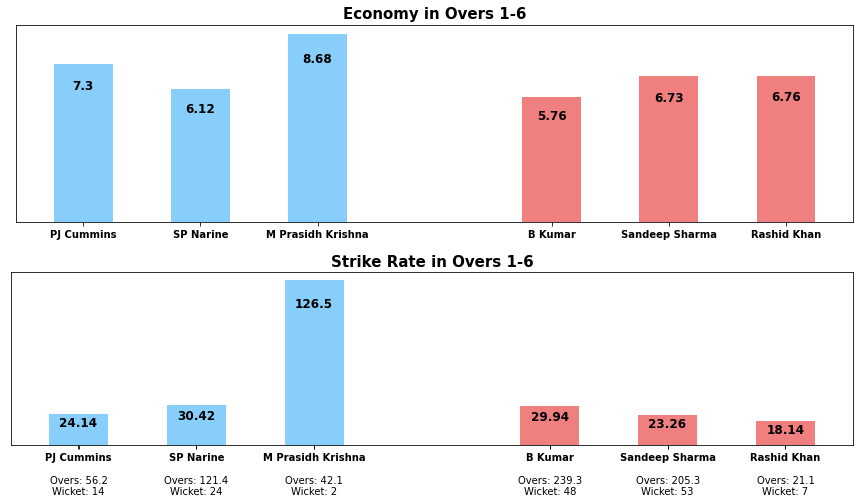

In [27]:
X = [0,1,2,4,5,6]
width = 0.5
fig=plt.figure(figsize=(15, 8))

ax1 = fig.add_subplot(211)

# ax1 = fig.add_axes([0,0,1,1])

x=list()
for i in X:
    x.extend([i,i+.001])
ax1.set_xticks(X) #X for dotballs x for SR

rects1Label='Economy'
rects1=ax1.bar(X, bowlersEconomy, color = (['lightskyblue']*3)+(['lightcoral']*3), width = width, label=rects1Label)
xticklabels=[]
for i in range(len(bowlerListinFirstSixOvers)):
    xticklabels.append(bowlerListinFirstSixOvers[i])
    
def autolabel(rects,ax):
    for rect in rects:
        h = rect.get_height()
#         ax.bar(color='red')
        ax.text(rect.get_x()+rect.get_width()/2., 0.9*h, h,
                ha='center', va='top',size=12,rotation=0,weight='bold') #bar-head font-size
autolabel(rects1,ax1)
for label in ax1.get_xticklabels():
        label.set_weight('bold')

ax1.set_xticklabels(xticklabels,size=10)
ax1.yaxis.set_visible(False)
ax1.set_title(rects1Label+" in Overs 1-6",weight='bold',size=15)


ax2 = fig.add_axes([0.12, 0.15, 0.78, 0.3])
rects2Label='Strike Rate'
rects2=ax2.bar(X, bowlersStrkrate, color =(['lightskyblue']*3)+(['lightcoral']*3), width = width, label=rects2Label)

ax2.set_xticks(x)
xticklabels=[]
for i in range(len(bowlerListinFirstSixOvers)):
    xticklabels.append(bowlerListinFirstSixOvers[i])
    xticklabels.append("\n\nOvers: "+str(totaloversBowled[i])+\
                "\nWicket: "+str(bowlersWicket[i]))
ax2.set_xticklabels(xticklabels,size=10)
autolabel(rects2,ax2)
for label in ax2.get_xticklabels():
    if label.get_text() in bowlerListinFirstSixOvers:
        label.set_weight('bold')
ax2.yaxis.set_visible(False)
ax2.set_title(rects2Label+" in Overs 1-6",weight='bold',size=15)
plt.show()
fig.savefig('KKR_SRH_1_6.png',bbox_inches='tight',pad_inches=0,dpi=500) #change filename

In [113]:
P=(['lightskyblue']*3)+(['ff']*3)
print(P)

['lightskyblue', 'lightskyblue', 'lightskyblue', 'ff', 'ff', 'ff']
